In [1]:
import ibmseti
import os
%matplotlib inline
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt
import zipfile
import scipy
from scipy.fftpack import rfft, irfft, fftfreq

In [2]:
#If you are running this in IBM Apache Spark (via Data Science Experience)
base_url = 'https://dal05.objectstorage.service.networklayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'

#ELSE, if you are outside of IBM:
#base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'

mydatafolder = os.path.join( os.environ['PWD'], 'my_data_folder' )
if os.path.exists(mydatafolder) is False:
    os.makedirs(mydatafolder)

filename = 'primary_testset_preview_v3.zip'
primary_testset_preview_url = '{}/simsignals_v3_zipped/{}'.format(base_url, filename)
os.system('curl {} > {}'.format(primary_testset_preview_url, mydatafolder +'/'+filename))

# Primary testset_preview Index File
# A CSV file containing the UUID, signal classifications for each file in the primary_small subset.
filename = 'public_list_primary_v3_testset_preview.csv'
primary_testset_preview_csv_url = '{}/simsignals_files/{}'.format(base_url, filename)
os.system('curl {} > {}'.format(primary_testset_preview_csv_url, mydatafolder +'/'+filename))

0

In [3]:
!ls -al "$mydatafolder"

total 11365368
drwx------ 6 sbb5-1ce73915b4fc6f-b77eb2b8b2db users       4096 Jul 31 17:20 .
drwxr-x--- 9 sbb5-1ce73915b4fc6f-b77eb2b8b2db users       4096 Jul 31 01:39 ..
-rw------- 1 sbb5-1ce73915b4fc6f-b77eb2b8b2db users 1157840757 Jul 20 15:38 basic4.zip
drwx------ 3 sbb5-1ce73915b4fc6f-b77eb2b8b2db users       4096 Jul 20 17:52 data_psm
drwx------ 2 sbb5-1ce73915b4fc6f-b77eb2b8b2db users     524288 Jul 10 14:00 png
drwx------ 2 sbb5-1ce73915b4fc6f-b77eb2b8b2db users       4096 Jul 20 17:51 png_psm
-rw------- 1 sbb5-1ce73915b4fc6f-b77eb2b8b2db users 2023055699 Jul 28 13:54 primary_small_v3.zip
-rw------- 1 sbb5-1ce73915b4fc6f-b77eb2b8b2db users  697495727 Jul 31 17:20 primary_testset_preview_v3.zip
-rw------- 1 sbb5-1ce73915b4fc6f-b77eb2b8b2db users     365027 Jul 28 13:54 public_list_primary_v3_small_21june_2017.csv
-rw------- 1 sbb5-1ce73915b4fc6f-b77eb2b8b2db users      79667 Jul 31 17:20 public_list_primary_v3_testset_preview.csv
drwx------ 2 sbb5-1ce73915b4fc6f-b77eb2b8b2db us

In [4]:
!ls my_data_folder/primary_testset_preview_v3.zip

my_data_folder/primary_testset_preview_v3.zip


In [5]:
zz = zipfile.ZipFile(mydatafolder + '/' + 'primary_testset_preview_v3.zip')
primary_testset_preview_v3list = zz.namelist()
print len(primary_testset_preview_v3list)

2415


In [6]:
index = 1511 #from the .dat file list in the zip folder. Nothing to do with the row number in Excel spread sheet 
firstfile = primary_testset_preview_v3list[index]
print firstfile

primary_testset_preview_v3/a0fc00087bceeafc516d90bf9b596fe8.dat


In [7]:
aca = ibmseti.compamp.SimCompamp(zz.open(firstfile).read())
aca.header()

{u'uuid': u'a0fc00087bceeafc516d90bf9b596fe8'}

# Find file number based on UUID 
for i in range(len(primary_small_v3list)-1):
    ftemp = primary_small_v3list[i+1]
    temp = ibmseti.compamp.SimCompamp(zz.open(ftemp).read())
    if temp.header()['uuid'] == '31643075-3e17-4332-92a4-2065524bccf0':
        print(i+1)
        break

In [8]:
# Fourth attempt: use a smoothing function
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

(32, 6144)


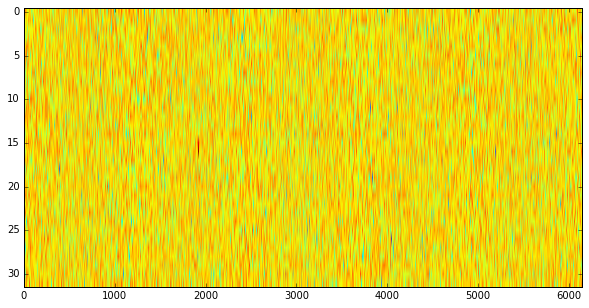

In [10]:
## ibmseti.compamp.SimCompamp has a method to calculate the spectrogram for you (without any signal 
## processing applied to the time-series data)
spectrogram = aca.get_spectrogram()
print spectrogram.shape
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log(spectrogram),  aspect = 0.5*float(spectrogram.shape[1]) / spectrogram.shape[0])
#plt.title('%s,     UUID: %s,     Index: %s'%(aca.header()['signal_classification'],aca.header()['uuid'],index))

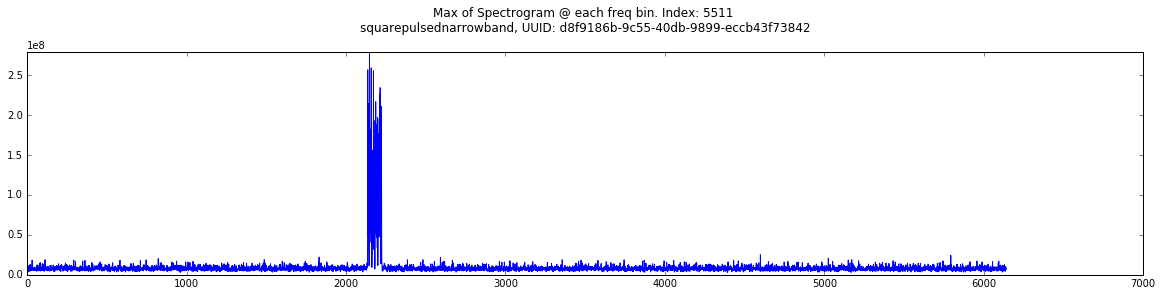

In [796]:
plt.figure(figsize=(20,4))
plt.plot(spectrogram.max(axis=0))
plt.ylim([0,spectrogram.max()])
plt.title('Max of Spectrogram @ each freq bin. Index: %s \n%s, UUID: %s\n'%(index, aca.header()['signal_classification'],aca.header()['uuid']))   

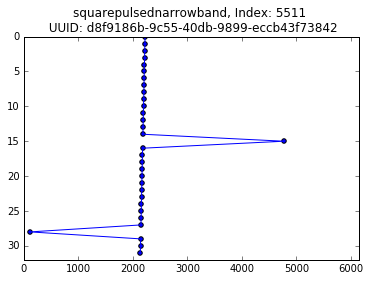

In [797]:
MaxAmps_Freq = spectrogram.argmax(1)
MaxAmps_Time = np.arange(32)

plt.plot(MaxAmps_Freq, MaxAmps_Time)
plt.scatter(MaxAmps_Freq, MaxAmps_Time)
plt.xlim([0,6144])
plt.ylim([32,0])
plt.title('%s, Index: %s \n UUID: %s'%(aca.header()['signal_classification'],index,aca.header()['uuid']))

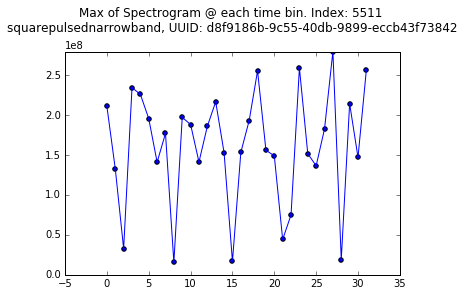

In [798]:
MaxAmps = spectrogram.max(axis=1)

plt.plot(MaxAmps)
plt.scatter(MaxAmps_Time,MaxAmps)
plt.ylim([0,spectrogram.max()])
plt.title('Max of Spectrogram @ each time bin. Index: %s \n%s, UUID: %s\n'%(index, aca.header()['signal_classification'],aca.header()['uuid']))   

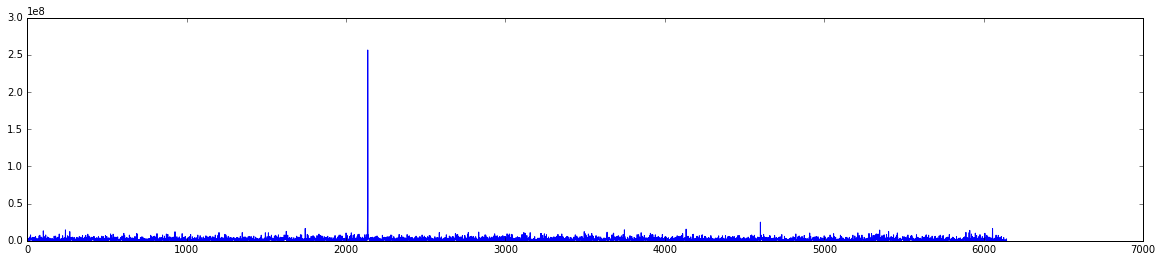

In [799]:
# Check out how one signal looks
plt.figure(figsize=(20,4))
plt.plot(spectrogram[31])

(0, 20000000000.0)

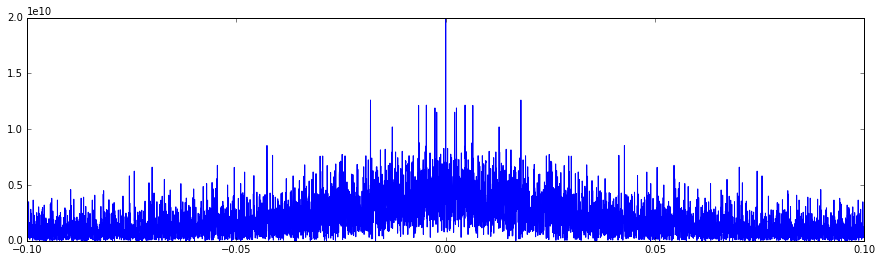

In [800]:
# First attempt: FFT #1
n = spectrogram[20].shape[0]
dx = 5.0    # Sampling period
Fk = fft.fft(spectrogram[0])/n    # Fourier coefficients (divided by n)
nu = fft.fftfreq(n,dx)  # Natural frequencies
Fk = fft.fftshift(Fk)   # Shift zero freq to center
nu = fft.fftshift(nu)   # Shift zero freq to center
plt.figure(figsize=(15,4))
plt.plot(nu, np.absolute(Fk)**2)  # Plot spectral power
plt.ylim([0,2e10])
#plt.xlim([-0.01,0.01])

In [801]:
# Second attempt: FFT #2 - FFT, filter, inv.FFT
time = np.linspace(0,spectrogram[0].shape[0],spectrogram[0].shape[0])
signal = spectrogram[4]
W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)

cut_f_signal = f_signal.copy()
cut_f_signal[np.logical_and(W>-0.001, W<0.5)] = 0 #0.05, Remove central freq
cut_signal = irfft(cut_f_signal)

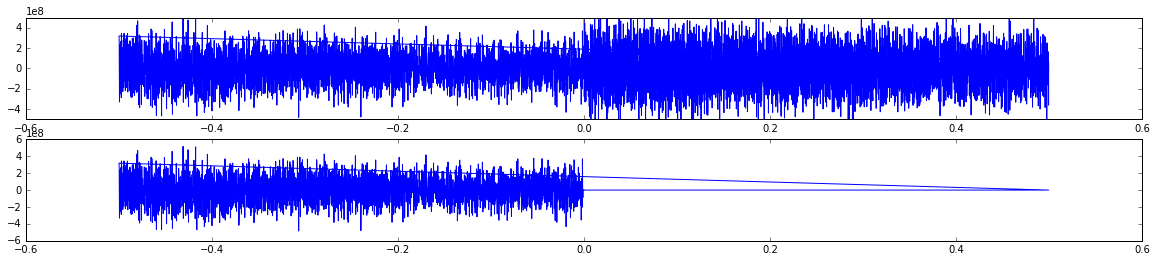

In [802]:
plt.figure(figsize=(20,4))
plt.subplot(211)
plt.plot(W,f_signal)
#plt.xlim([-1,1])
plt.ylim([-0.5e9,0.5e9])
plt.subplot(212)
plt.plot(W,cut_f_signal)
#plt.ylim([-1500,3000])
plt.show()

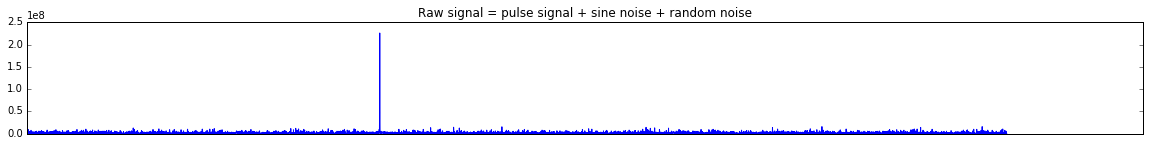

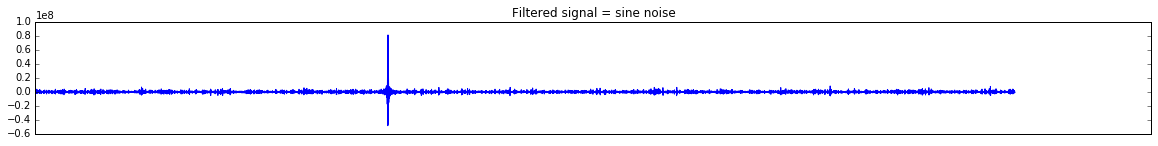

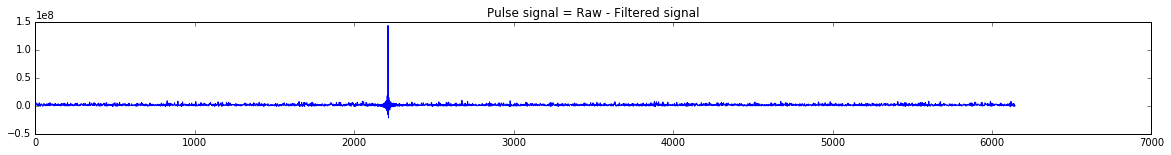

In [803]:
plt.figure(figsize=(20,2))
plt.plot(time,signal)
plt.title('Raw signal = pulse signal + sine noise + random noise')
plt.xticks([])

plt.figure(figsize=(20,2))
plt.plot(time,cut_signal) 
plt.title('Filtered signal = sine noise')
plt.xticks([])

plt.figure(figsize=(20,2))
plt.plot(time,signal-cut_signal)
plt.title('Pulse signal = Raw - Filtered signal')
#plt.xlim([2.5,3])

In [804]:
# Try "Second attempt" from above over entire spectrogram
spect_fftDSP = np.zeros(spectrogram.shape)
for cnt in range(32):
    signal = spectrogram[cnt]
    W = fftfreq(signal.size, d=time[1]-time[0])
    f_signal = rfft(signal)

    cut_f_signal = f_signal.copy()
    cut_f_signal[np.logical_and(W>-0.05, W<0.05)] = 0 #0.05, Remove central freq
    cut_signal = irfft(cut_f_signal)
    spect_fftDSP[cnt] = signal - cut_signal

/usr/local/src/bluemix_jupyter_bundle.v54/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


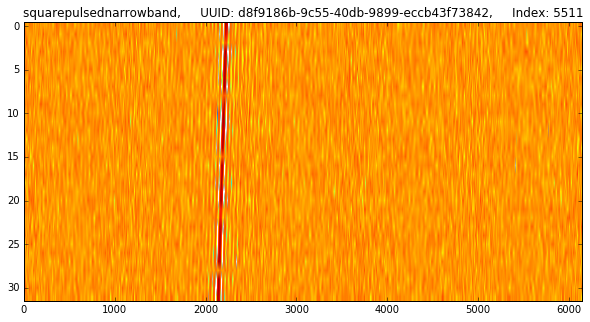

In [805]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log(spect_fftDSP),  aspect = 0.5*float(spect_fftDSP.shape[1]) / spect_fftDSP.shape[0])#, cmap=plt.get_cmap('gray'))
plt.title('%s,     UUID: %s,     Index: %s'%(aca.header()['signal_classification'],aca.header()['uuid'],index))

In [806]:
print aca.header()['uuid']

d8f9186b-9c55-40db-9899-eccb43f73842


In [807]:
# Try smoothing after fft subtraction
spectrogram3 = np.asarray([smooth(spect_fftDSP[i],130) for i in range(32)]) 

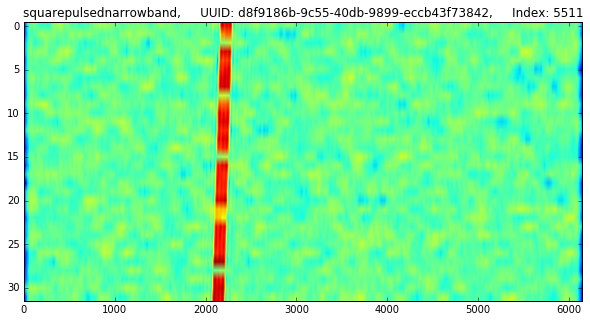

In [808]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log(spectrogram3),  aspect = 0.5*float(spectrogram3.shape[1]) / spectrogram3.shape[0])#, cmap=plt.get_cmap('gray'))
plt.title('%s,     UUID: %s,     Index: %s'%(aca.header()['signal_classification'],aca.header()['uuid'],index))

1941242.65674
1872987.80825


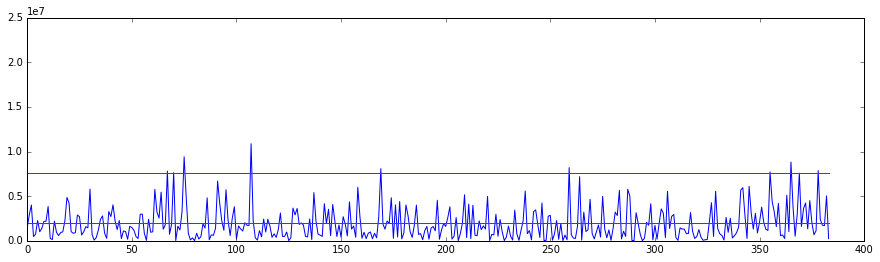

In [809]:
# Third attempt: Sample part of the noise
plt.figure(figsize=(15,4))
plt.plot(spectrogram[0][0:384])
spec_mean = np.mean(spectrogram[0][0:384])
spec_std = np.std(spectrogram[0][0:384])
spec_std_ul = spec_mean+3*spec_std
spec_std_ll = spec_mean-3*spec_std
plt.plot(np.tile(spec_mean,384))
plt.plot(np.tile(spec_std_ul,384))
plt.plot(np.tile(spec_std_ll,384))
plt.ylim([0,25000000])
print np.mean(spectrogram[0][0:384])
print np.std(spectrogram[0][0:384])

In [810]:
# Third-b attempt: Subtract the Sample part of the noise
#plt.figure(figsize=(15,4))
#plt.plot(spectrogram[0]-np.tile(spectrogram[0][0:384],16))
#plt.xlim([0,500])
#plt.ylim([0,25000000])

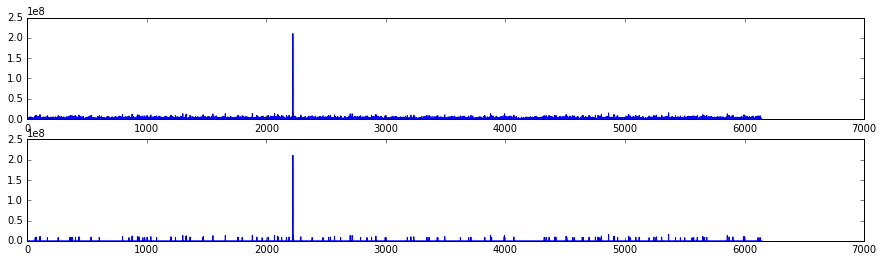

In [811]:
# Third-a attempt: Remove signals that are less than few std.dev.
spect1 = np.zeros(spectrogram[0].shape[0])
for i in range(spectrogram[0].shape[0]):
    if spectrogram[0][i] > spec_std_ul:
        spect1[i] = spectrogram[0][i]

plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.plot(spectrogram[0])
plt.subplot(2,1,2)
plt.plot(spect1)

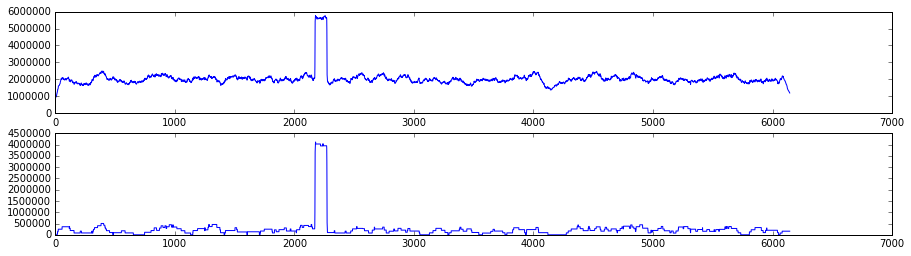

In [812]:
# Fourth attempt: use a smoothing function in combination with Third attempt
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.plot(smooth(spectrogram[0],100))
plt.subplot(2,1,2)
plt.plot(smooth(spect1,100))

In [813]:
# Try FFT #2 (FFT, filter, inv.FFT) on Smoothed signals
temp_index = 4
time  = np.linspace(0,spectrogram[0].shape[0],spectrogram[0].shape[0])
signal = smooth(spectrogram[temp_index],100)#spectrogram[0]
W = fftfreq(signal.size, d=time[1]-time[0])
f_signal = rfft(signal)

cut_f_signal = f_signal.copy()
cut_f_signal[np.logical_and(W>-0.5, W<0.05)] = 0 #0.05, Remove central freq
cut_signal = irfft(cut_f_signal)

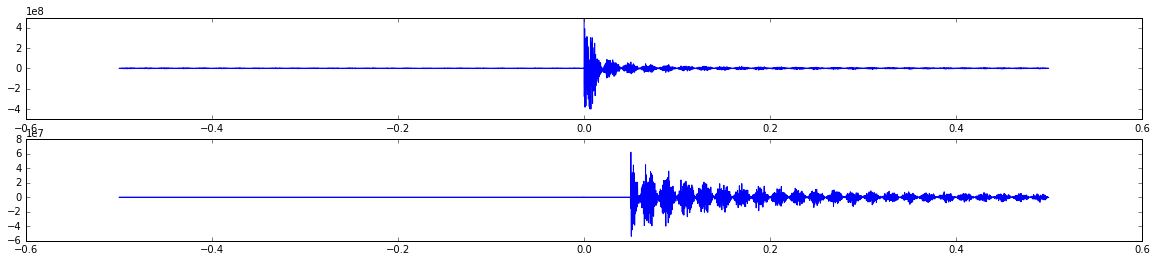

In [814]:
plt.figure(figsize=(20,4))
plt.subplot(211)
plt.plot(W,f_signal)
#plt.xlim([-1,1])
plt.ylim([-0.5e9,0.5e9])
plt.subplot(212)
plt.plot(W,cut_f_signal)
#plt.ylim([-1500,3000])
plt.show()

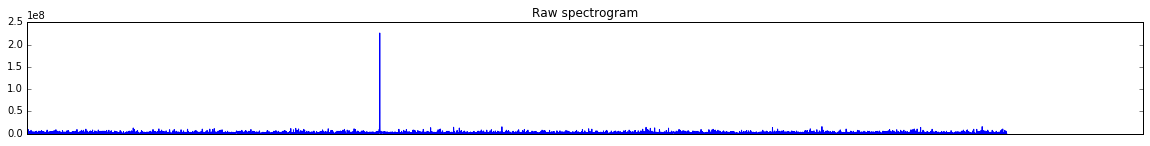

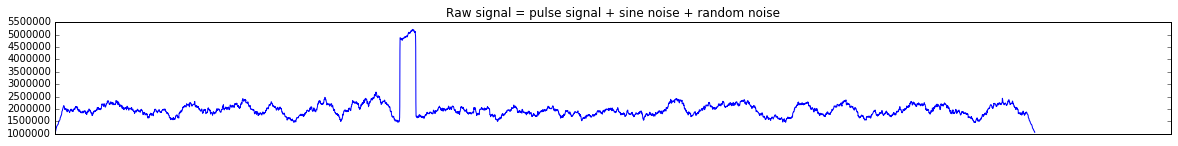

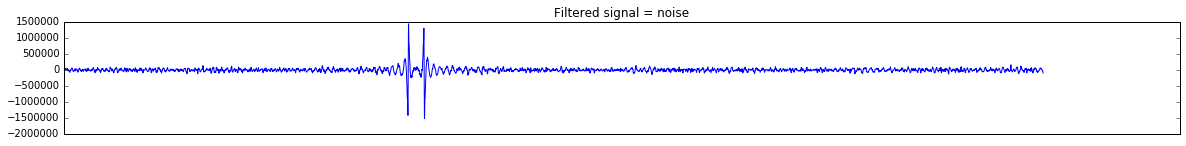

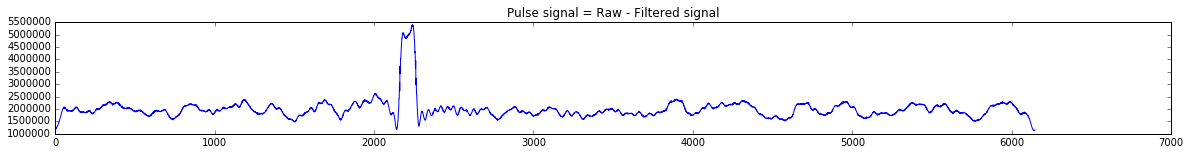

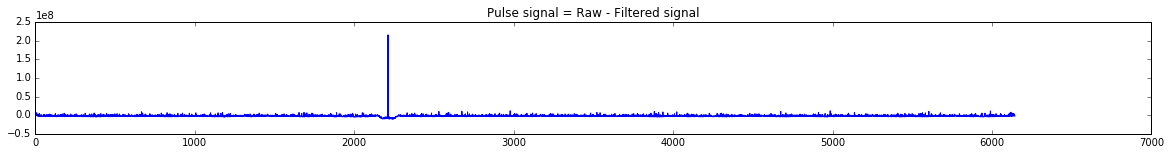

In [815]:
plt.figure(figsize=(20,2))
plt.plot(time,spectrogram[temp_index])
plt.title('Raw spectrogram')
plt.xticks([])

plt.figure(figsize=(20,2))
plt.plot(time,signal)
plt.title('Raw signal = pulse signal + sine noise + random noise')
plt.xticks([])

plt.figure(figsize=(20,2))
plt.plot(time,cut_signal) 
plt.title('Filtered signal = noise')
plt.xticks([])

plt.figure(figsize=(20,2))
plt.plot(time,signal-cut_signal)
plt.title('Pulse signal = Raw - Filtered signal')
#plt.xlim([2.5,3])

plt.figure(figsize=(20,2))
plt.plot(time,spectrogram[temp_index]-2*(signal-cut_signal))
plt.title('Pulse signal = Raw - Filtered signal')
#plt.xlim([2.5,3])

In [816]:
# Try "Second attempt" from above over entire spectrogram
spect_fftDSP2 = np.zeros(spectrogram.shape)
for cnt in range(32):
    signal2 = smooth(spectrogram[cnt],100)
    W2 = fftfreq(signal2.size, d=time[1]-time[0])
    f_signal2 = rfft(signal2)

    cut_f_signal2 = f_signal2.copy()
    cut_f_signal2[np.logical_and(W2>-5, W2<5)] = 0 #0.05, Remove central freq
    cut_signal2 = irfft(cut_f_signal2)
    spect_fftDSP2[cnt] = signal2 - cut_signal2

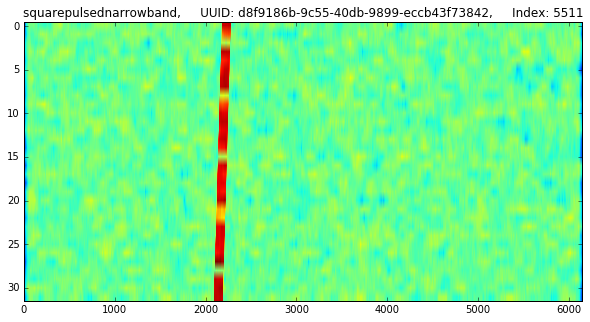

In [817]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log(spect_fftDSP2),  aspect = 0.5*float(spect_fftDSP2.shape[1]) / spect_fftDSP2.shape[0])#, cmap=plt.get_cmap('gray'))
plt.title('%s,     UUID: %s,     Index: %s'%(aca.header()['signal_classification'],aca.header()['uuid'],index))

In [11]:
# Smoothing seems to work the best, so smooth the entire spectrogram
# spectrogram ---> 'numpy.ndarray'. smooth(spectrogram) ---> 'list'
spectrogram2 = np.asarray([smooth(spectrogram[i],100) for i in range(32)]) 

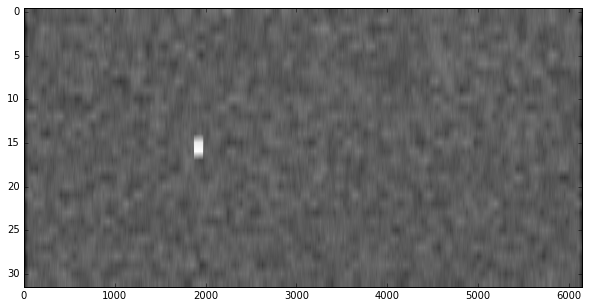

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log(spectrogram2),  aspect = 0.5*float(spectrogram2.shape[1]) / spectrogram2.shape[0], cmap=plt.get_cmap('gray'))
#plt.title('%s,     UUID: %s,     Index: %s'%(aca.header()['signal_classification'],aca.header()['uuid'],index))

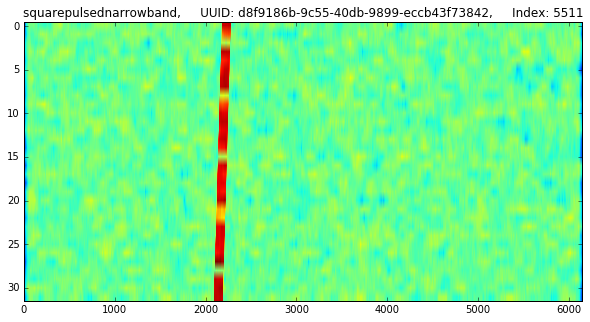

In [820]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log(spectrogram2),  aspect = 0.5*float(spectrogram2.shape[1]) / spectrogram2.shape[0])#, cmap=plt.get_cmap('gray'))
plt.title('%s,     UUID: %s,     Index: %s'%(aca.header()['signal_classification'],aca.header()['uuid'],index))

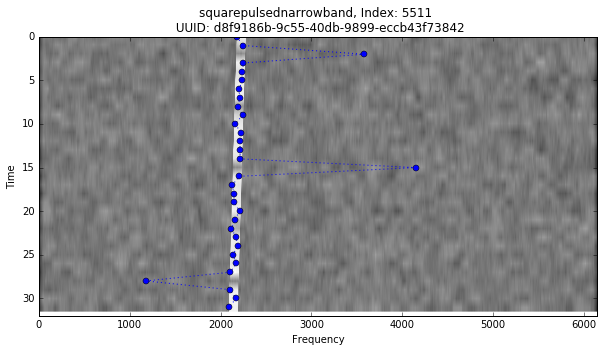

In [821]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(np.log(spectrogram2),  aspect = 0.5*float(spectrogram2.shape[1]) / spectrogram2.shape[0], cmap=plt.get_cmap('gray'))

MaxAmps_Freq2 = spectrogram2.argmax(1)
MaxAmps_Time2 = np.arange(32)
plt.plot(MaxAmps_Freq2, MaxAmps_Time2, ':o')#, mfc='none')
#plt.scatter(MaxAmps_Freq2, MaxAmps_Time2,'o')
plt.xlim([0,6144])
plt.ylim([32,0])
plt.title('%s, Index: %s \n UUID: %s'%(aca.header()['signal_classification'],index,aca.header()['uuid']))
plt.xlabel('Frequency')
plt.ylabel('Time')

In [822]:
MaxAmps_Freq2

array([2177, 2248, 3582, 2251, 2240, 2240, 2203, 2210, 2192, 2243, 2157,
       2230, 2219, 2211, 2218, 4150, 2206, 2130, 2146, 2150, 2210, 2158,
       2119, 2172, 2188, 2135, 2172, 2107, 1178, 2099, 2171, 2095])

In [823]:
MaxAmps_Freq2[31]

2095

In [824]:
test = [(MaxAmps_Freq2[i+1]-MaxAmps_Freq2[i]) for i in range(31)]
print(test)
print(len(test))

[71, 1334, -1331, -11, 0, -37, 7, -18, 51, -86, 73, -11, -8, 7, 1932, -1944, -76, 16, 4, 60, -52, -39, 53, 16, -53, 37, -65, -929, 921, 72, -76]
31


In [825]:
sum([1 if ((MaxAmps_Freq2[i+2]>MaxAmps_Freq2[i+1] and MaxAmps_Freq2[i]>MaxAmps_Freq2[i+1] and \
           (abs(MaxAmps_Freq2[i+2]-MaxAmps_Freq2[i+1])>500 or abs(MaxAmps_Freq2[i]-MaxAmps_Freq2[i+1])>500))\
 or (MaxAmps_Freq2[i+2]<MaxAmps_Freq2[i+1] and MaxAmps_Freq2[i]<MaxAmps_Freq2[i+1] and \
           (abs(MaxAmps_Freq2[i+2]-MaxAmps_Freq2[i+1])>500 or abs(MaxAmps_Freq2[i]-MaxAmps_Freq2[i+1])>500)))
           else 0 for i in range(30)])

3

In [826]:
[1 if ((MaxAmps_Freq2[i+2]>MaxAmps_Freq2[i+1] and MaxAmps_Freq2[i]>MaxAmps_Freq2[i+1] and \
           (abs(MaxAmps_Freq2[i+2]-MaxAmps_Freq2[i+1])>500 or abs(MaxAmps_Freq2[i]-MaxAmps_Freq2[i+1])>500))\
 or (MaxAmps_Freq2[i+2]<MaxAmps_Freq2[i+1] and MaxAmps_Freq2[i]<MaxAmps_Freq2[i+1] and \
           (abs(MaxAmps_Freq2[i+2]-MaxAmps_Freq2[i+1])>500 or abs(MaxAmps_Freq2[i]-MaxAmps_Freq2[i+1])>500)))
           else 0 for i in range(30)]

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [827]:
[1 if (MaxAmps_Freq2[i+2]>MaxAmps_Freq2[i+1] and MaxAmps_Freq2[i]>MaxAmps_Freq2[i+1])\
 or (MaxAmps_Freq2[i+2]<MaxAmps_Freq2[i+1] and MaxAmps_Freq2[i]<MaxAmps_Freq2[i+1]) else 0 for i in range(30)]

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1]

In [828]:
sum(map(abs,[(MaxAmps_Freq2[i+1]-MaxAmps_Freq2[i]) for i in range(31)]))

9390

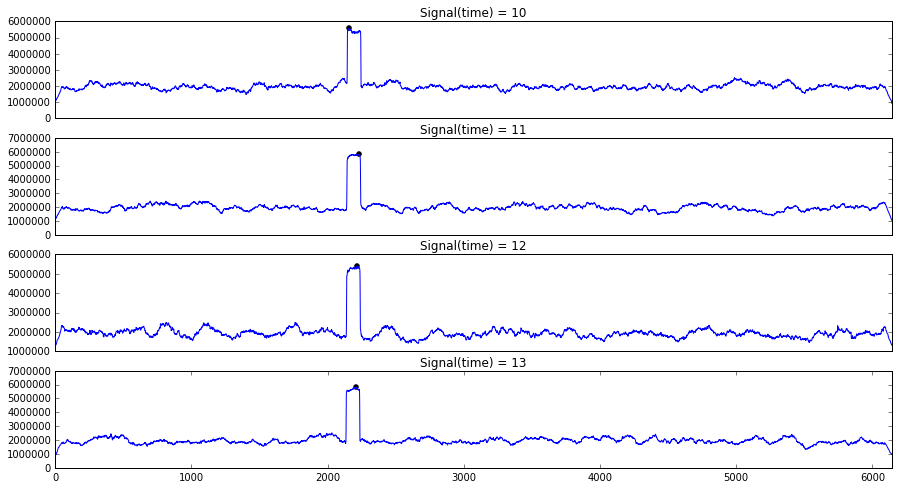

In [829]:
#Sequential plots
t_start = 10 #First plot number
n = 4 #Number of plots
plt.figure(figsize=(15,n*2))
for j in range(n):
    plt.subplot(n,1,j+1)
    plt.plot(spectrogram2[t_start+j])
    plt.scatter(spectrogram2[t_start+j].argmax(0),spectrogram2[t_start+j][spectrogram2[t_start+j].argmax(0)],color='black')
    if j < n-1:
        plt.xticks([])
    plt.xlim([0,6144])
    plt.title('Signal(time) = %s'%(t_start+j))

2256.46875
458.411318058


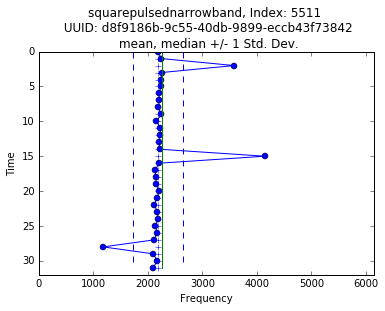

In [830]:
MaxAmps_Freq2 = spectrogram2.argmax(1)
MaxAmps_Time2 = np.arange(32)

print(np.mean(MaxAmps_Freq2))
print(np.std(MaxAmps_Freq2))
mean=np.tile(np.mean(MaxAmps_Freq2),32)
median=np.tile(np.median(MaxAmps_Freq2),32)
std=np.tile(np.std(MaxAmps_Freq2),32)

nStdDev2 = 1

plt.plot(MaxAmps_Freq2, MaxAmps_Time2,'-o')
#plt.scatter(MaxAmps_Freq2, MaxAmps_Time2)
plt.plot(mean, MaxAmps_Time2)
plt.plot(median, MaxAmps_Time2, 'b+')
plt.plot(median + nStdDev2 * std, MaxAmps_Time2,'b--')
plt.plot(median - nStdDev2 * std, MaxAmps_Time2,'b--')
plt.xlim([0,6144])
plt.ylim([32,0])
plt.title('%s, Index: %s \n UUID: %s\n mean, median +/- %s Std. Dev.'%(aca.header()['signal_classification'],index,aca.header()['uuid'],nStdDev))
plt.xlabel('Frequency')
plt.ylabel('Time')

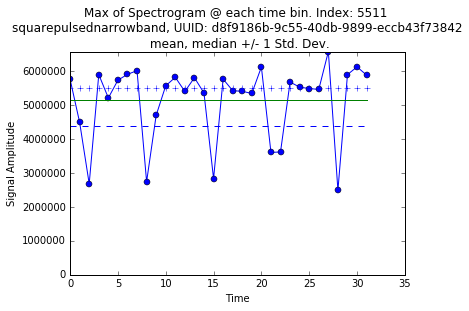

In [831]:
MaxAmps2 = spectrogram2.max(axis=1)
mean=np.tile(np.mean(spectrogram2.max(axis=1)),32)
median=np.tile(np.median(spectrogram2.max(axis=1)),32)
std=np.tile(np.std(spectrogram2.max(axis=1)),32)
nStdDev = 1
plt.plot(MaxAmps_Time2, MaxAmps2,'-o')
#plt.scatter(MaxAmps_Time2, MaxAmps2)
plt.plot(mean)
plt.plot(median,'b+')
plt.plot(median + nStdDev * std,'b--')
plt.plot(median - nStdDev * std,'b--')
plt.ylim([0,spectrogram2.max()])
plt.title('Max of Spectrogram @ each time bin. Index: %s \n%s, UUID: %s\n mean, median +/- %s Std. Dev.'%(index, aca.header()['signal_classification'],aca.header()['uuid'],nStdDev))   
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')

In [832]:
sum([1 if i>(median[0]+std[0]) else 0 for i in spectrogram2.max(axis=1)])

0

In [833]:
np.log10(max([(i-median[0]) if i>(median[0]+std[0]) else 0 for i in spectrogram2.max(axis=1)]))

/usr/local/src/bluemix_jupyter_bundle.v54/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


-inf

In [834]:
print('Mean  ', np.mean(spectrogram2.max(axis=1)))
print('Median', np.median(spectrogram2.max(axis=1)))
print('ratio ', np.mean(spectrogram2.max(axis=1))/np.median(spectrogram2.max(axis=1)))

('Mean  ', 5135567.9891047981)
('Median', 5507866.7502242625)
('ratio ', 0.93240599709419159)


# Trying quadratic fit

(32, 0)

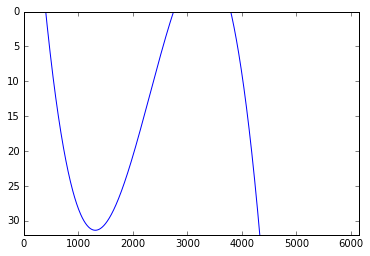

In [835]:
z = np.polyfit(MaxAmps_Freq2, MaxAmps_Time2, 3)
xp = np.linspace(0, 6000, 1000)
p = np.poly1d(z)
plt.plot(xp, p(xp))
plt.xlim([0,6144])
plt.ylim([32,0])

# Trying linear fit

In [836]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(MaxAmps_Freq2, MaxAmps_Time2)
print('slope = ',slope)
print('intercept = ',intercept)
print('r_value = ',r_value)
print('log(p_value) = ',np.log10(p_value))

('slope = ', -0.0061633487336035858)
('intercept = ', 29.407403812728568)
('r_value = ', -0.30600243296485941)
('log(p_value) = ', -1.0529733035870603)


(32, 0)

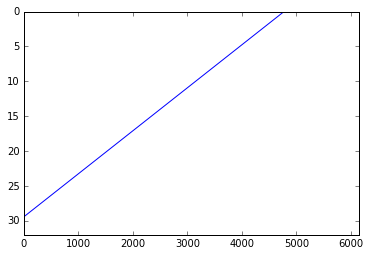

In [837]:
yfit = np.polyval(np.polyfit(MaxAmps_Freq2, MaxAmps_Time2,1),xp)
plt.plot(xp, yfit)
plt.xlim([0,6144])
plt.ylim([32,0])